In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [2]:
start = input("Enter start year in yyyy-mm-dd format") 
end = input("Enter end year in yyyy-mm-dd format") 
stock = input("Enter the stock symbol") 
data = yf.download(stock,start,end)

Enter start year in yyyy-mm-dd format 2012-01-01
Enter end year in yyyy-mm-dd format 2023-12-22
Enter the stock symbol SBUX


[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,23.424999,23.520000,22.639999,22.645000,18.330667,12922400
2012-01-04,22.705000,23.315001,22.639999,23.084999,18.686831,13886800
2012-01-05,23.094999,23.200001,22.775000,23.180000,18.763731,9731800
2012-01-06,23.190001,23.455000,23.115000,23.360001,18.909437,8105400
2012-01-09,23.365000,23.400000,23.135000,23.295000,18.856821,7261600
...,...,...,...,...,...,...
2023-12-15,97.839996,98.239998,96.559998,96.750000,96.750000,12463800
2023-12-18,97.239998,97.320000,95.919998,96.559998,96.559998,6146400
2023-12-19,96.940002,98.050003,96.940002,97.720001,97.720001,5992900


In [4]:
data.reset_index(inplace = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,23.424999,23.520000,22.639999,22.645000,18.330667,12922400
1,2012-01-04,22.705000,23.315001,22.639999,23.084999,18.686831,13886800
2,2012-01-05,23.094999,23.200001,22.775000,23.180000,18.763731,9731800
3,2012-01-06,23.190001,23.455000,23.115000,23.360001,18.909437,8105400
4,2012-01-09,23.365000,23.400000,23.135000,23.295000,18.856821,7261600
...,...,...,...,...,...,...,...
3008,2023-12-15,97.839996,98.239998,96.559998,96.750000,96.750000,12463800
3009,2023-12-18,97.239998,97.320000,95.919998,96.559998,96.559998,6146400
3010,2023-12-19,96.940002,98.050003,96.940002,97.720001,97.720001,5992900
3011,2023-12-20,96.360001,96.879997,94.650002,94.709999,94.709999,10057400


In [5]:
ma_50_days = data.Close.rolling(50).mean()

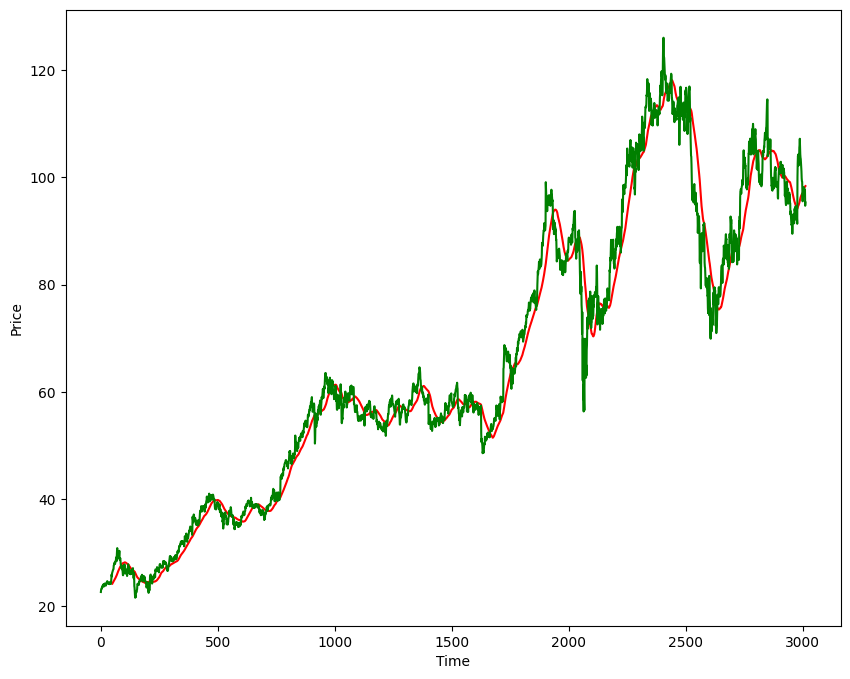

In [6]:
plt.figure(figsize=(10,8))
plt.plot(ma_50_days,"r",label="MA(50)")
plt.plot(data.Close, "g",label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [7]:
ma_100_days = data.Close.rolling(100).mean()

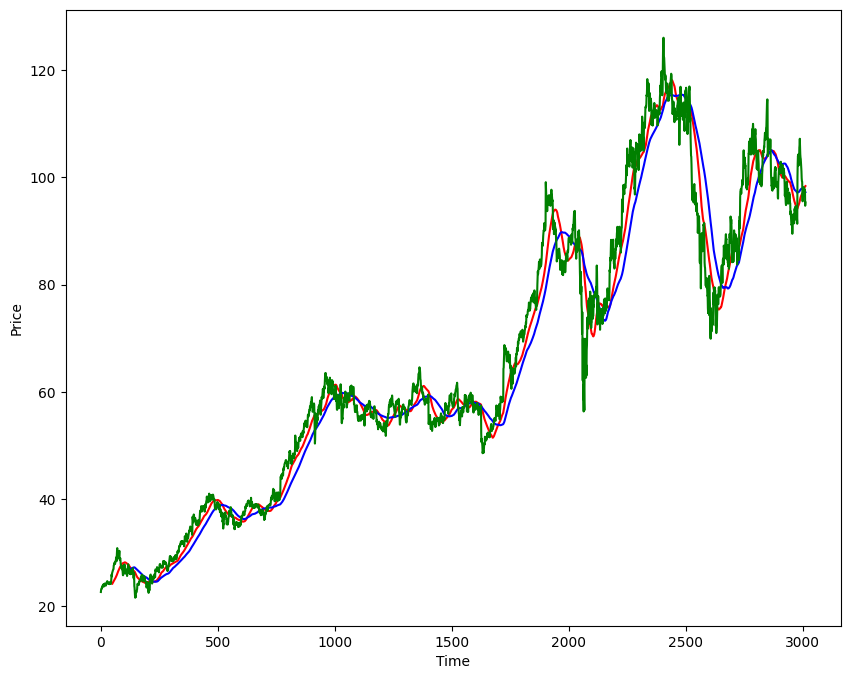

In [8]:
plt.figure(figsize=(10,8))
plt.plot(ma_50_days,"r",label="MA(50)")
plt.plot(ma_100_days,"b",label="MA(100)")
plt.plot(data.Close, "g",label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

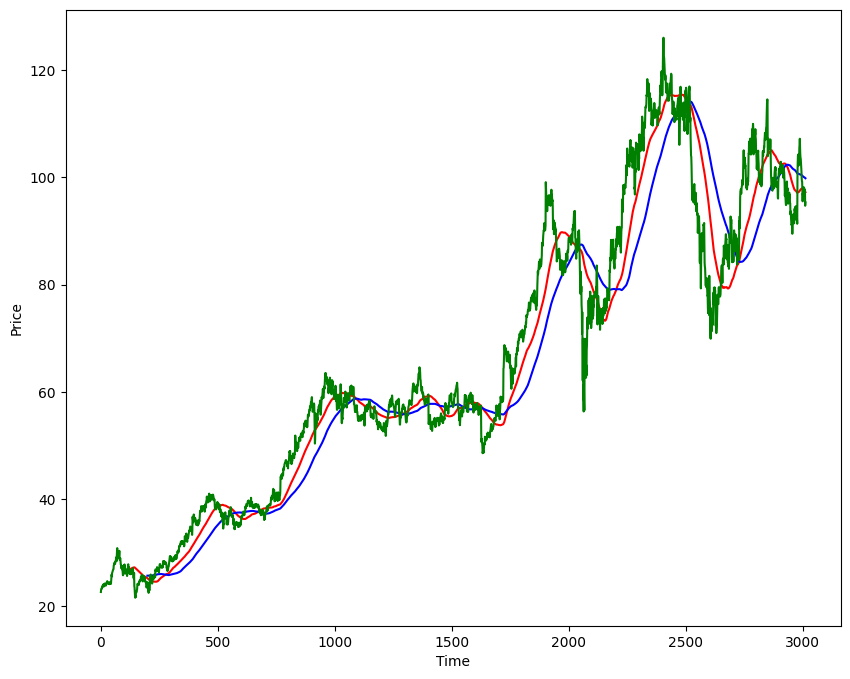

In [10]:
plt.figure(figsize=(10,8))
plt.plot(ma_100_days,"r",label="MA(100)")
plt.plot(ma_200_days,"b",label="MA(200)")
plt.plot(data.Close, "g",label="Origrinal Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0:int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80) : len(data)])

In [13]:
data_train.shape[0], data_test.shape[0]

(2410, 603)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x,y = [],[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x,y = np.array(x),np.array(y)
model = Sequential()
model.add(LSTM(units=50,activation="relu", return_sequences = True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [17]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [18]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50

73/73 [==============================] - 23s 118ms/step - loss: 0.0250
Epoch 2/50
73/73 [==============================] - 9s 128ms/step - loss: 0.0059
Epoch 3/50
73/73 [==============================] - 10s 142ms/step - loss: 0.0052
Epoch 4/50
73/73 [==============================] - 10s 143ms/step - loss: 0.0046
Epoch 5/50
73/73 [==============================] - 13s 179ms/step - loss: 0.0045
Epoch 6/50
73/73 [==============================] - 11s 151ms/step - loss: 0.0039
Epoch 7/50
73/73 [==============================] - 11s 151ms/step - loss: 0.0037
Epoch 8/50
73/73 [==============================] - 11s 153ms/step - loss: 0.0038
Epoch 9/50
73/73 [==============================] - 11s 146ms/step - loss: 0.0035
Epoch 10/50
73/73 [==============================] - 11s 150ms/step - loss: 0.0033
Epoch 11/50
73/73 [==============================] - 11s 148ms/step - loss: 0.0031
Epoch 12/50
73/73 [==============================] - 11s 152ms/step - loss: 0.0033
Epoch 13/50
7

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days,data_test], ignore_index=True)
data_test

,Close
0,107.779999
1,107.320000
2,107.809998
3,108.900002
4,111.339996
...,...
698,96.750000
699,96.559998
700,97.720001
701,94.709999


In [21]:
data_test_scale = scaler.fit_transform(data_test)

In [22]:
x,y = [],[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [23]:
x,y = np.array(x), np.array(y)
y_predict = model.predict(x)

19/19 [==============================] - 1s 37ms/step


In [24]:
scale = 1/scaler.scale_

In [25]:
y_predict = y_predict*scale
y = y*scale

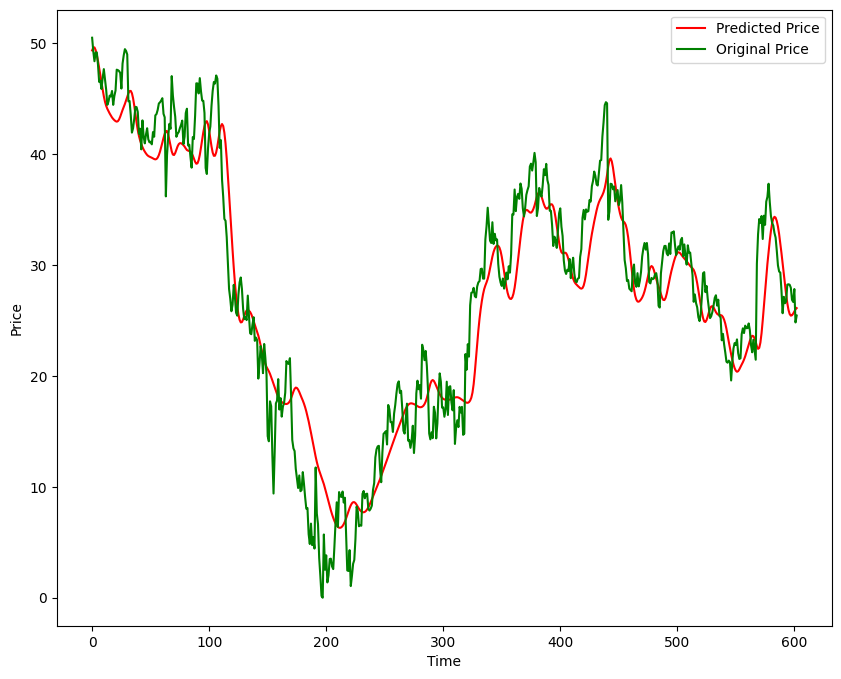

In [26]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,"r",label="Predicted Price")
plt.plot(y,"g",label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [27]:
model.save("Stock Predictions Model.keras")